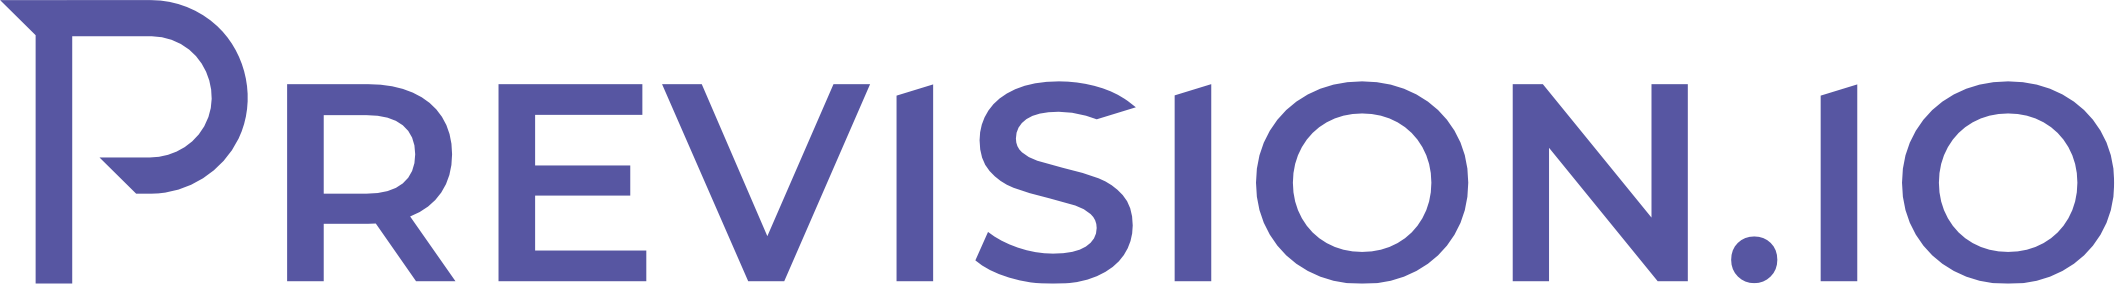

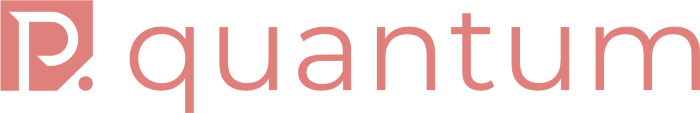

# Prevision-quantum-nn for reinforcement learning

This notebook aims at showing the possibility of using quantum algorithms in order to perform reinforcement learning.

First the useful libraries are imported:

In [1]:
import gym

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import prevision_quantum_nn as qnn

Then the environment is defined. For this notebook, the environment "LunarLander-v2" is imported from gym. Other environments can be used, but check their format!

In [29]:
environment = gym.make("LunarLander-v2")

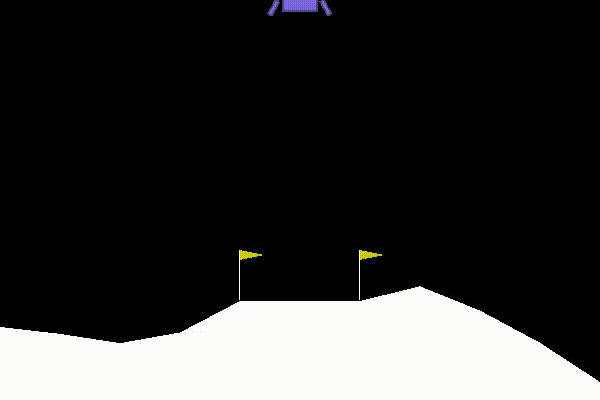

The model parameters are defined. These parameters configure the application itself.

List of model parameters for the classification application:
- architecture: type or architecture (qubit or cv, for continuous variables). Type: string
- num_q: number of qubits/qumodes used. Type: integer
- encoding: data encoding method. Type: string
- use_early_stopper: allows the use of an early stop during the fit. Type: boolean
- early_stopper_patience: patience of the early stopper. Type: integer
- max_iterations: maximum number of epoch during the fit. Type: integer
- interface: interface option for Pennylane (autograd or tf). Type: string
- layer_type: type of circuit (template or custom). Type: boolean
- snapshot_frequency: snapshot_frequency: frequency in number of iterations at which the model needs to snapshot. Type: int
- verbose: allows verbosity during the fit. Type: boolean
- prefix: base name of the saved output files and plots. Type: string
- num_layers: depth of the quantum circuit. Type: integer
- optimizer_name: defines the optimizer used for the fit. Type: string
- learning_rate: learning rate of the optimizer. Type: float

In [ ]:
model_params = {
    "architecture": "cv",
    "encoding": "displacement",
    "interface": "autograd",
    "num_layers": 3,
    "learning_rate": 0.001,
    "cutoff_dim": 4,
    "prefix": "lunar_lander"
}

Since all the parameters were defined, the application can be built. In the case of the reinforcement learning, three options are available through the "rl_learner_type" parameter:
- quantum (default)
- qtable
- deep

In [ ]:
application = qnn.get_application("reinforcement_learning",
                                  prefix="lunar_lander",
                                  model_params=model_params)

Before solving the application, save the parameters in order to be able to reload them in case of interruption of the solve method you will still have the weights file genereated by the snapshot_frequency keyword and will be able to reload the application, with the weights you want.

In [ ]:
application.save_params()

The application can now be solved. Progression is shown below.

In [ ]:
application.solve(environment, render=True, tqdm_verbose=False)

The evolution the reward during the process can be visualized by refreshing the cell below.

In [31]:
parsing = qnn.parse_results("lunar_lander.listing")
qnn.plot_reward(parsing, prefix="qnn")